# Multiclass diabetes prediction.
##### Task 1: Definining Exploratory Data Analysis with an overview of the whole project and also problem framing.
##### Task 2: Importing libraries and Exploring the Dataset.
##### Task 3: Visualizing Data and Preprocessing it.
##### Task 4: Preparing the data to fit it into the model.
##### Task 5: Trying to find a good model for it.
##### Task 6: Save best model in PKL file.

# Task 2: Importing libraries and Exploring the Dataset.


In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
import xgboost as xgb

In [17]:
diabetesData = pd.read_csv("Multiclass Diabetes Dataset.csv")

In [19]:
diabetesData.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [21]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [23]:
# Shuffel classes because it is ordered
diabetesData = diabetesData.sample(frac=1).reset_index(drop=True)

In [25]:
diabetesData.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,61,10.5,111,8.2,3.8,3.0,0.9,1.7,1.3,39.0,2
1,1,55,3.0,30,9.1,6.6,2.9,1.1,4.3,1.3,29.0,2
2,0,35,9.1,114,7.2,5.6,1.4,1.4,3.6,0.6,20.0,2
3,0,25,10.0,35,4.0,4.3,3.5,0.8,1.3,0.8,22.0,0
4,0,39,3.2,55,5.0,4.6,1.3,1.0,3.0,0.6,21.0,0


In [27]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [29]:
diabetesData.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


# Task 3: Visualizing Data and Preprocessing it.

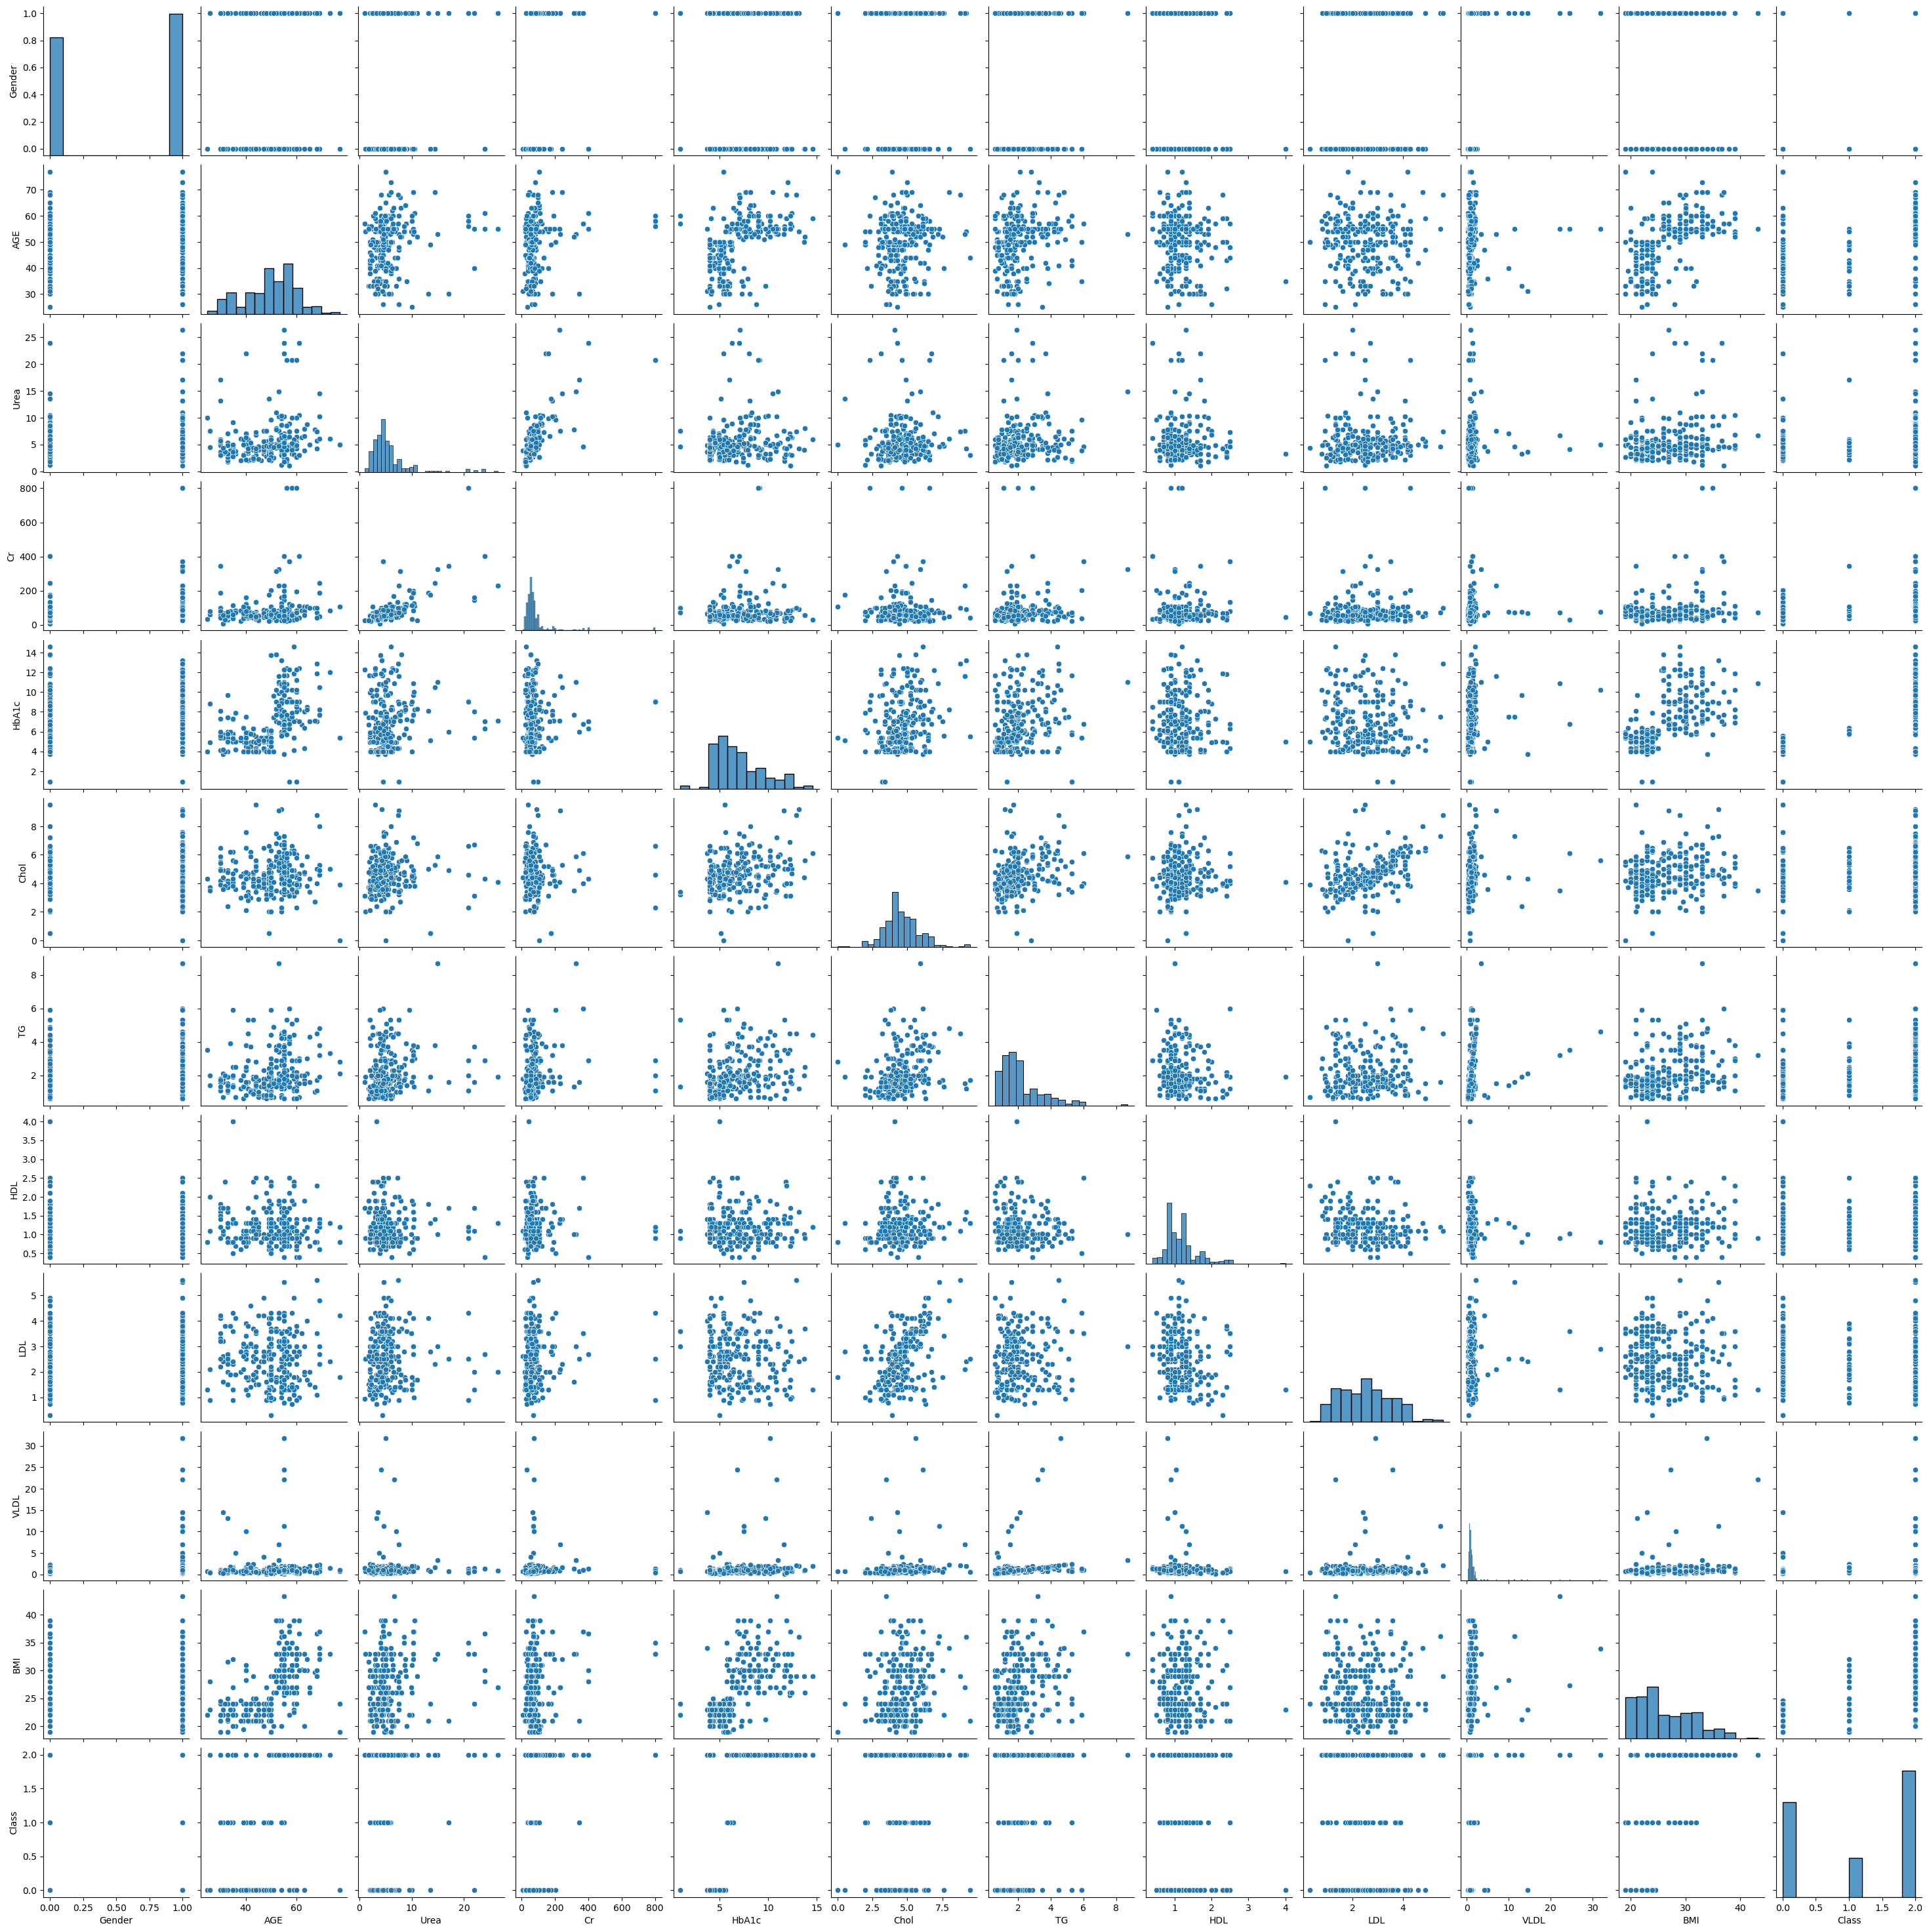

In [34]:
sns.pairplot(diabetesData)

1- Gender isn't important for prediction (remove)
2- Age is important
3- Urea is important
4- Cr is important
5- HbA1c is important
6- chol not imortant because I have HDL and TG (remove)
7- TG important
8- HDL important
9- derive TG/HDL ratio
10- LDL not important (remove)
11- VLDL not important (remove)
12- BMI important 

In [ ]:
filtered_diabetes = diabetesData.copy()

filtered_diabetes.drop(columns=['Gender', 'Chol', 'LDL', 'VLDL'], inplace=True)

filtered_diabetes['TG_to_HDL'] = filtered_diabetes['TG'] / filtered_diabetes['HDL'] #feature engineering

cols_to_keep = [
    'AGE','Urea',
    'Cr',
    'HbA1c',
    'TG', 'HDL', 'TG_to_HDL',
    'BMI',
    'Class'
]
filtered_diabetes = filtered_diabetes[[col for col in cols_to_keep if col in filtered_diabetes.columns]]

In [157]:
filtered_diabetes.head()

,AGE,Urea,Cr,HbA1c,TG,HDL,TG_to_HDL,BMI,Class
0,61,10.5,111,8.2,3.0,0.9,3.333333,39.0,2
1,55,3.0,30,9.1,2.9,1.1,2.636364,29.0,2
2,35,9.1,114,7.2,1.4,1.4,1.000000,20.0,2
3,25,10.0,35,4.0,3.5,0.8,4.375000,22.0,0
4,39,3.2,55,5.0,1.3,1.0,1.300000,21.0,0


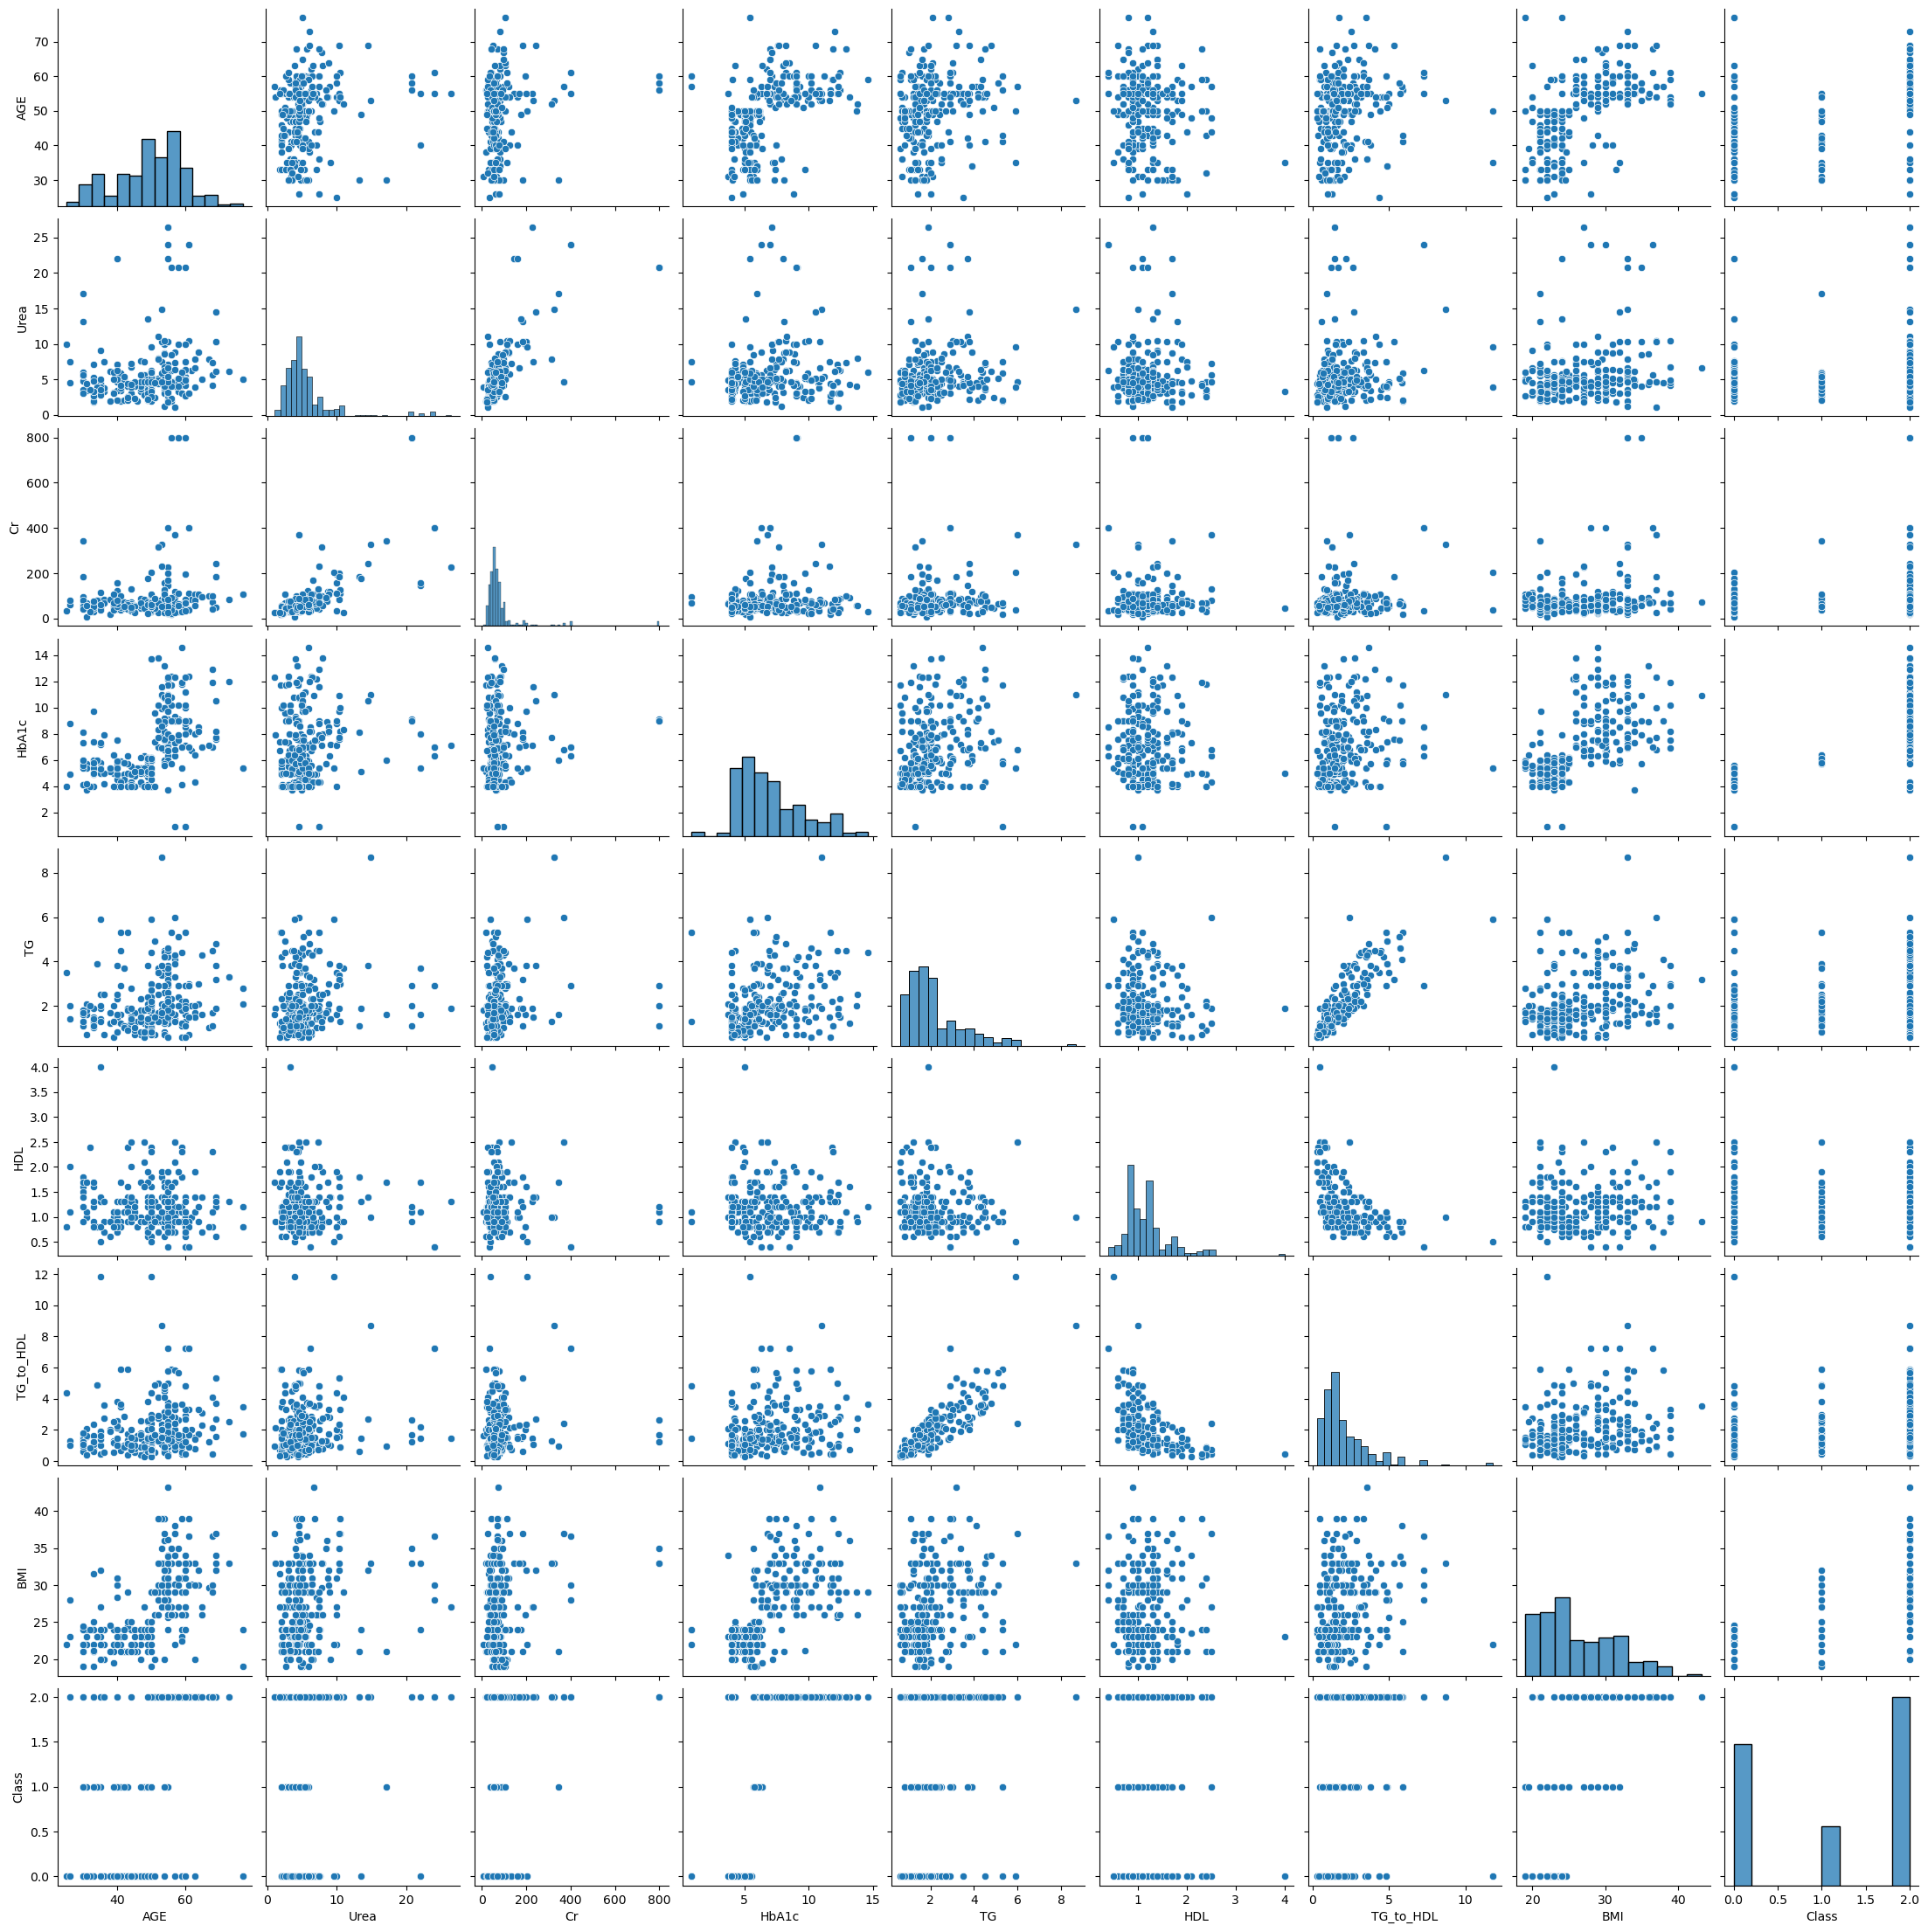

In [159]:
sns.pairplot(filtered_diabetes)

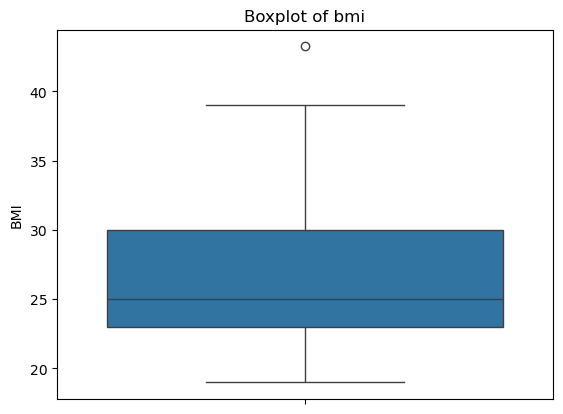

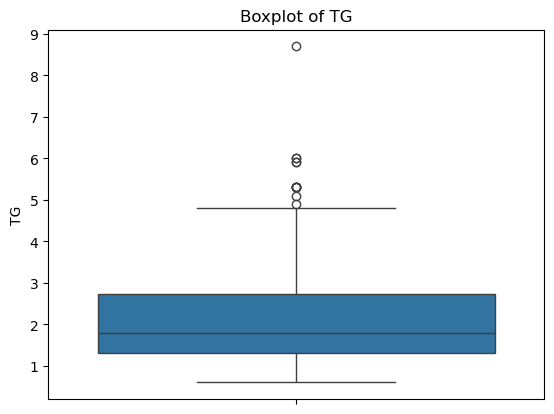

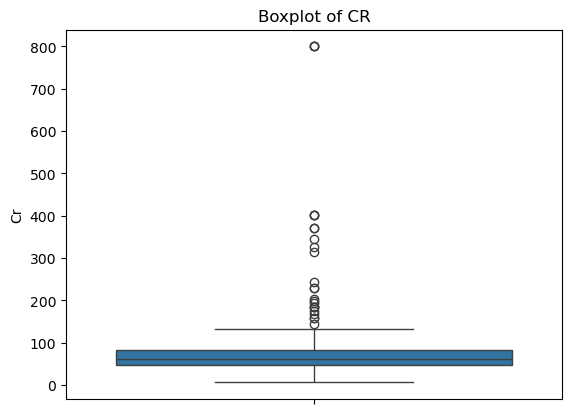

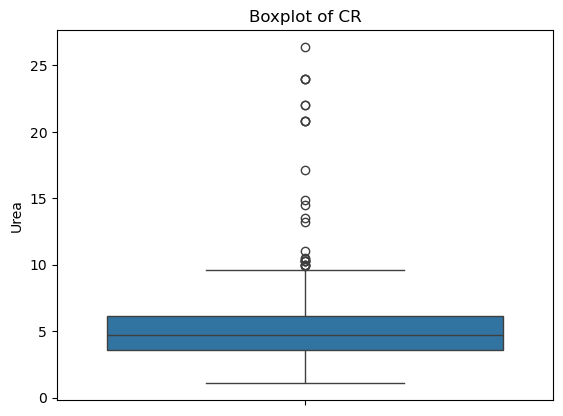

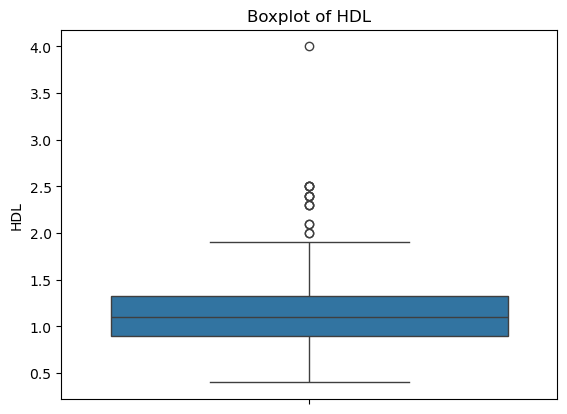

In [160]:
sns.boxplot(filtered_diabetes['BMI'])
plt.title('Boxplot of bmi')
plt.show()
sns.boxplot(filtered_diabetes['TG'])
plt.title('Boxplot of TG')
plt.show()
sns.boxplot(filtered_diabetes['Cr'])
plt.title('Boxplot of CR')
plt.show()
sns.boxplot(filtered_diabetes['Urea'])
plt.title('Boxplot of CR')
plt.show()
sns.boxplot(filtered_diabetes['HDL'])
plt.title('Boxplot of HDL')
plt.show()

this data needs to be scaled before we putting it to a model specially we have numbers like Cr and BMI that is very big compared to other feature numbers

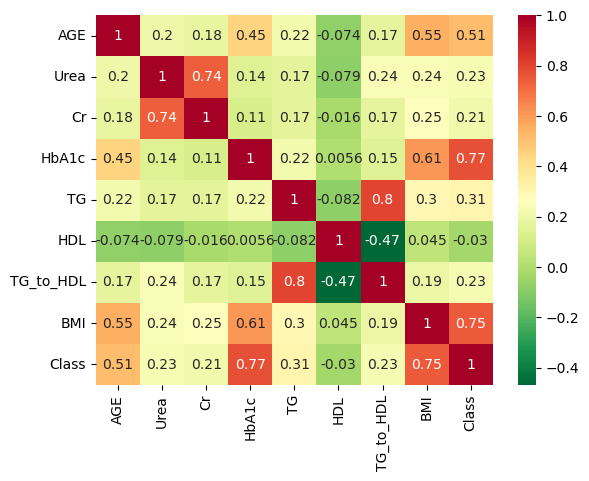

In [162]:
sns.heatmap(filtered_diabetes.corr(), cmap='RdYlGn_r', annot=True)
plt.show()

From this Heatmap HDL won't be important in this case because it is very has very low corr and it's visualization doesn't indicate anything (remove it)

In [164]:
filtered_diabetes.drop("HDL",axis= 1,inplace= True)

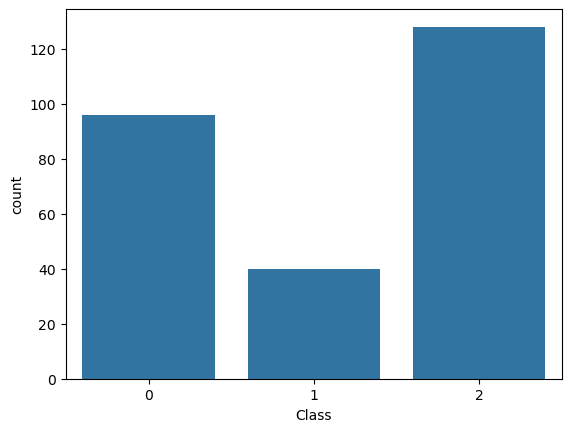

In [165]:
sns.countplot(x='Class', data=filtered_diabetes)
plt.show()

the data has low number of samples at class 1 so I think I need to do up sampling before putting it into a model

# Task 4: Preparing the data to fit it into the model.

In [403]:
X = filtered_diabetes.drop('Class', axis=1)
y = filtered_diabetes['Class']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42 )

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Task 5: Trying to find a good model for it.

In [438]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8679245283018868
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.64      0.88      0.74         8
           2       0.96      0.92      0.94        26

    accuracy                           0.87        53
   macro avg       0.83      0.86      0.84        53
weighted avg       0.88      0.87      0.87        53



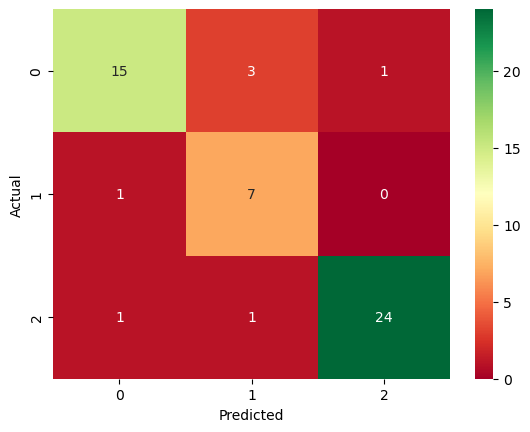

In [407]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="RdYlGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The problem here there is wrong prediction that there is a 3 patients are good but they accually have diabetes and also the prediction of one patient that he is good but the model should warn him he might have diabetes

In [412]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9056603773584906
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.70      0.88      0.78         8
           2       0.96      0.92      0.94        26

    accuracy                           0.91        53
   macro avg       0.87      0.90      0.88        53
weighted avg       0.92      0.91      0.91        53



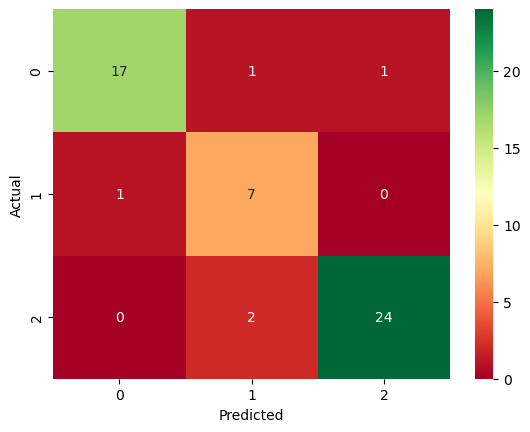

In [417]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="RdYlGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Still the same two problems

In [506]:
rf_model = RandomForestClassifier(n_estimators=10, max_depth= 5, min_samples_leaf=10,random_state= 42) #number of descision trees
rf_model.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)

train_preds = rf_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train_resampled, train_preds)
print("Train Accuracy:", train_acc)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_rf))

Train Accuracy: 0.9607843137254902
Accuracy: 0.9622641509433962
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        26

    accuracy                           0.96        53
   macro avg       0.95      0.97      0.96        53
weighted avg       0.97      0.96      0.96        53



I got test acc at first 98 but the training acc was 100 so the model was likely overfitting so I optimized it to make the mode generali

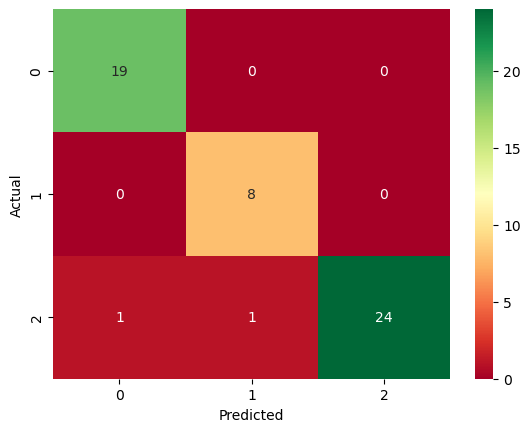

In [508]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix, annot=True, cmap="RdYlGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

this model is the best one among all of them

# Task 6: Save best model in PKL file.

In [302]:
# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [304]:
# Save the scaler 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']